# Linear Regression Model

In this Notebook, I'll build a simple linear regression and multiple regression model using the **Car** dataset, following the instructions from the book *Murach's Python for Data Analysis* by Scott Mccoy.

---

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

cars = pd.read_csv('cars.csv')

In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Use the dataset to predict the price of a car based on a set of independent variables

# Simple Linear Regression Model

<AxesSubplot:>

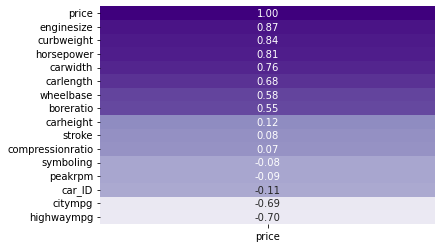

In [5]:
sns.heatmap(cars.corr()[['price']].sort_values('price', ascending=False),
            cmap='Purples', vmin=-1, vmax=1, annot=True, cbar=False, fmt='.2f')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = cars[['enginesize']]
Y = cars[['price']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=20)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression().fit(X_train, Y_train)

In [10]:
train_score = model.score(X_train, Y_train)
test_score = model.score(X_test, Y_test)
print(f"The score of the training dataset is {train_score:.3f}")
print(f"The score of the test dataset is {test_score:.3f}")

The score of the training dataset is 0.771
The score of the test dataset is 0.703


In [11]:
print(f"The linear regression equation is: Y = {model.coef_[0][0]}X + {model.intercept_[0]}")

The linear regression equation is: Y = 172.61500571211266X + -8327.960903953557


In [12]:
Y_pred = model.predict(X_test)

In [13]:
Y_pred

array([[15147.67987289],
       [ 7207.38961014],
       [ 7552.61962156],
       [26712.88525561],
       [ 7552.61962156],
       [ 8415.69465012],
       [ 7380.00461585],
       [10314.45971295],
       [12385.8397815 ],
       [12558.45478721],
       [ 7207.38961014],
       [ 8588.30965583],
       [19980.90003283],
       [ 8415.69465012],
       [10314.45971295],
       [ 7207.38961014],
       [14111.98983862],
       [ 8415.69465012],
       [12731.06979292],
       [16010.75490145],
       [12731.06979292],
       [ 7552.61962156],
       [23260.58514136],
       [22915.35512994],
       [14802.44986147],
       [12213.22477579],
       [ 8588.30965583],
       [10314.45971295],
       [21189.20507282],
       [ 7552.61962156],
       [12731.06979292],
       [ 7552.61962156],
       [ 8415.69465012],
       [10314.45971295],
       [10659.68972438],
       [10487.07471867],
       [12731.06979292],
       [22915.35512994],
       [ 8588.30965583],
       [12731.06979292],


In [14]:
pred_price = pd.DataFrame(Y_pred, columns=['pred_price'])
pred_data = pred_price.join([X_test.reset_index(drop=True), Y_test.reset_index(drop=True)])
pred_data[['enginesize', 'price', 'pred_price']].head()

,enginesize,price,pred_price
0,136,15250.0,15147.679873
1,90,8916.5,7207.389610
2,92,8778.0,7552.619622
3,203,31400.5,26712.885256
4,92,6488.0,7552.619622


#### Plot the predicted data manually

In [15]:
melt_pred = pred_data.melt(id_vars='enginesize', value_vars=['price', 'pred_price'], 
                           var_name='price_type', value_name='price_value')
melt_pred

,enginesize,price_type,price_value
0,136,price,15250.000000
1,90,price,8916.500000
2,92,price,8778.000000
3,203,price,31400.500000
4,92,price,6488.000000
...,...,...,...
131,121,pred_price,12558.454787
132,91,pred_price,7380.004616
133,70,pred_price,3755.089496
134,141,pred_price,16010.754901


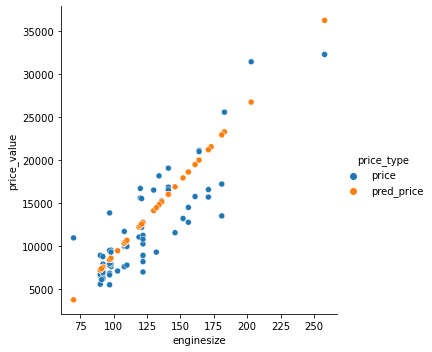

In [16]:
sns.relplot(data=melt_pred, x='enginesize', y='price_value', hue='price_type')

#### Plot the predicted data using ***lmplot()*** method

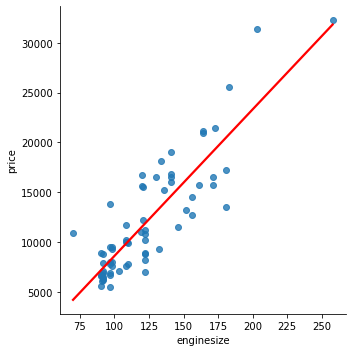

In [17]:
sns.lmplot(data=pred_data, x='enginesize', y='price', ci=None, line_kws={'color':'red'})

#### Calculate and plot the residuals

In [18]:
pred_data['residual'] = pred_data.price - pred_data.pred_price
pred_data.head()

,pred_price,enginesize,price,residual
0,15147.679873,136,15250.0,102.320127
1,7207.389610,90,8916.5,1709.110390
2,7552.619622,92,8778.0,1225.380378
3,26712.885256,203,31400.5,4687.614744
4,7552.619622,92,6488.0,-1064.619622


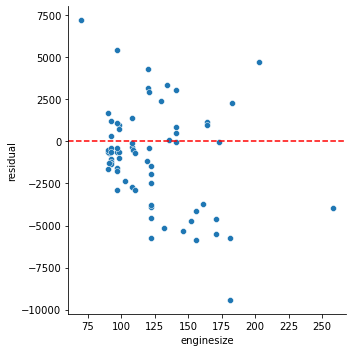

In [19]:
g = sns.relplot(data=pred_data, x='enginesize', y='residual')
g.axes.flat[0].axhline(0, ls='--', color='red')

<AxesSubplot:xlabel='residual', ylabel='Density'>

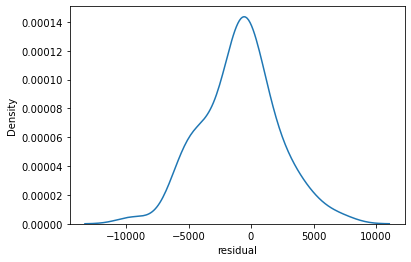

In [20]:
sns.kdeplot(data=pred_data, x='residual')

#### Using **residplot()** method

<AxesSubplot:xlabel='enginesize', ylabel='price'>

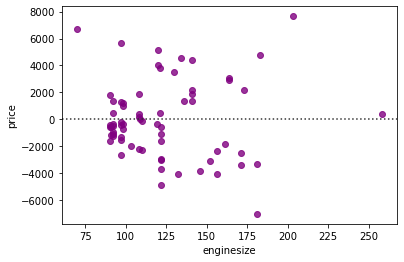

In [21]:
sns.residplot(data=pred_data, x='enginesize', y='price', scatter_kws={"color":"purple"})

## Create a simple linear regression model using **Statsmodels** module

In [22]:
from statsmodels.formula.api import ols

In [23]:
model_ols = ols("price ~ enginesize", data=cars).fit()
model_ols.params

Intercept    -8005.445531
enginesize     167.698416
dtype: float64

In [24]:
print(f"The linear regression equation is: Y = {model_ols.params.enginesize:.3f}X + {model_ols.params.Intercept:.3f}")

The linear regression equation is: Y = 167.698X + -8005.446


In [25]:
prediction = cars.sort_values('enginesize')[['enginesize', 'price']]
prediction['pred_price'] = model_ols.predict(prediction.enginesize)
prediction['residual'] = prediction.price - prediction.pred_price

In [26]:
prediction = prediction.join(pd.Series(model_ols.resid, name="model_residual"))

In [27]:
prediction.head()

,enginesize,price,pred_price,residual,model_residual
18,61,5151.0,2224.157869,2926.842131,2926.842131
57,70,13645.0,3733.443616,9911.556384,9911.556384
55,70,10945.0,3733.443616,7211.556384,7211.556384
56,70,11845.0,3733.443616,8111.556384,8111.556384
32,79,5399.0,5242.729364,156.270636,156.270636


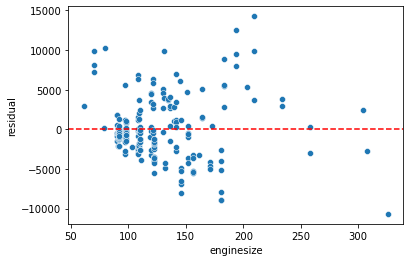

In [28]:
ax = sns.scatterplot(data=prediction, x='enginesize', y='residual')
ax.axhline(0, ls='--', color='red')

In [29]:
melt = prediction.melt(id_vars='enginesize', value_vars=['price', 'pred_price'], 
                       var_name='price_type', value_name='price_value')
melt.head()

,enginesize,price_type,price_value
0,61,price,5151.0
1,70,price,13645.0
2,70,price,10945.0
3,70,price,11845.0
4,79,price,5399.0


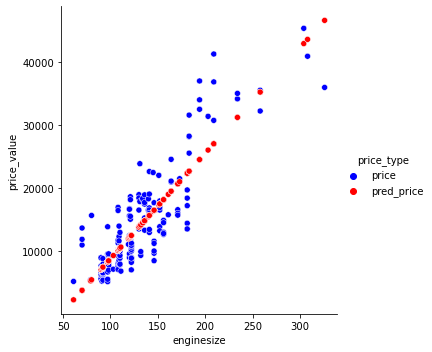

In [30]:
sns.relplot(data=melt, x='enginesize', y='price_value', hue='price_type', palette=['blue', 'red'])

# Multiple Regression Model

## Work with numeric variable

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = cars[['enginesize', 'curbweight']]
Y = cars.price
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=20)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
mul_model = LinearRegression().fit(X_train, Y_train)

In [35]:
print(f"The score of the training dataset is {mul_model.score(X_train, Y_train):.3f}")
print(f"The score of the test dataset is {mul_model.score(X_test, Y_test):.3f}")

The score of the training dataset is 0.800
The score of the test dataset is 0.735


In [36]:
print(f"The linear regression equation: Y = {mul_model.coef_[0]:.3f}X1 + {mul_model.coef_[1]:.3f}X2 + {mul_model.intercept_}")

The linear regression equation: Y = 116.997X1 + 5.366X2 + -14907.549050029862


In [37]:
Y_pred = mul_model.predict(X_test)

predicted = pd.DataFrame(Y_pred, columns=['pred_price'])
predicted = predicted.join([X_test.reset_index(drop=True), Y_test.reset_index(drop=True)])
predicted = predicted[['enginesize', 'curbweight', 'price', 'pred_price']]
predicted.head()

,enginesize,curbweight,price,pred_price
0,136,2507,15250.0,14457.256312
1,90,1874,8916.5,5678.554646
2,92,3110,8778.0,12545.261389
3,203,3366,31400.5,26905.667600
4,92,2015,6488.0,6669.192636


#### Calculate and plot the residuals

In [38]:
predicted['residual'] = predicted.price - predicted.pred_price
predicted.head()

,enginesize,curbweight,price,pred_price,residual
0,136,2507,15250.0,14457.256312,792.743688
1,90,1874,8916.5,5678.554646,3237.945354
2,92,3110,8778.0,12545.261389,-3767.261389
3,203,3366,31400.5,26905.667600,4494.832400
4,92,2015,6488.0,6669.192636,-181.192636


<AxesSubplot:xlabel='residual', ylabel='Density'>

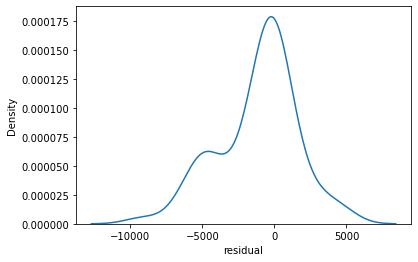

In [39]:
sns.kdeplot(data=predicted, x='residual',)

- Compared to the KDE plot for the residuals from the simple regression above, the KDE plot for the residuals from the multiple regression is pretty similar.  
- However, the curve from the multiple regression has compressed inward, which indicates that the predictions improved a little.


## Work with categorical variables

In [40]:
cars.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

- The **fueltype**, **aspiration**, **doornumber**, **enginelocation** columns have only two unique values, so they are probably **dichotomous** variables.
- The **symboling**, **carbody**, **drivewheel**, **enginetype**, **cylindernumber**, **fuelsystem** columns have more than two values but much fewer than the other columns, so they can be either **nominal** or **ordinal** varibles.

In [41]:
categories = ['fueltype', 'aspiration', 'doornumber','enginelocation',
            'symboling', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem']
for col in categories:
    display(cars[col].value_counts().to_frame())  

,fueltype
gas,185
diesel,20


,aspiration
std,168
turbo,37


,doornumber
four,115
two,90


,enginelocation
front,202
rear,3


,symboling
0,67
1,54
2,32
3,27
-1,22
-2,3


,carbody
sedan,96
hatchback,70
wagon,25
hardtop,8
convertible,6


,drivewheel
fwd,120
rwd,76
4wd,9


,enginetype
ohc,148
ohcf,15
ohcv,13
dohc,12
l,12
rotor,4
dohcv,1


,cylindernumber
four,159
six,24
five,11
eight,5
two,4
three,1
twelve,1


,fuelsystem
mpfi,94
2bbl,66
idi,20
1bbl,11
spdi,9
4bbl,3
mfi,1
spfi,1


Choose *well balanced variables*, which have a similar number of entries, to build a better model.  
However, a column is well balanced does not mean that it has a high $R^2$ value.  
In this case, the **fuelsystem**, **doornumber**, and **carbody** can be considerd well balanced variables.

#### Create dummy variables

In [42]:
cat_columns = ['aspiration', 'doornumber', 'carbody', 'drivewheel']
dummies = pd.get_dummies(cars[cat_columns])
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   aspiration_std       205 non-null    uint8
 1   aspiration_turbo     205 non-null    uint8
 2   doornumber_four      205 non-null    uint8
 3   doornumber_two       205 non-null    uint8
 4   carbody_convertible  205 non-null    uint8
 5   carbody_hardtop      205 non-null    uint8
 6   carbody_hatchback    205 non-null    uint8
 7   carbody_sedan        205 non-null    uint8
 8   carbody_wagon        205 non-null    uint8
 9   drivewheel_4wd       205 non-null    uint8
 10  drivewheel_fwd       205 non-null    uint8
 11  drivewheel_rwd       205 non-null    uint8
dtypes: uint8(12)
memory usage: 2.5 KB


In [43]:
# Comebine the dummy variables with the original DataFrame and drop the original categorical columns.

cars_dummies = cars.drop(columns=cat_columns).join(dummies)
cars_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_ID               205 non-null    int64  
 1   symboling            205 non-null    int64  
 2   CarName              205 non-null    object 
 3   fueltype             205 non-null    object 
 4   enginelocation       205 non-null    object 
 5   wheelbase            205 non-null    float64
 6   carlength            205 non-null    float64
 7   carwidth             205 non-null    float64
 8   carheight            205 non-null    float64
 9   curbweight           205 non-null    int64  
 10  enginetype           205 non-null    object 
 11  cylindernumber       205 non-null    object 
 12  enginesize           205 non-null    int64  
 13  fuelsystem           205 non-null    object 
 14  boreratio            205 non-null    float64
 15  stroke               205 non-null    flo

In [44]:
cars_dummies.head()

,car_ID,symboling,CarName,fueltype,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
0,1,3,alfa-romero giulia,gas,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,1,1,0,0,0,0,0,0,1
1,2,3,alfa-romero stelvio,gas,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,1,1,0,0,0,0,0,0,1
2,3,1,alfa-romero Quadrifoglio,gas,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,1,0,0,1,0,0,0,0,1
3,4,2,audi 100 ls,gas,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,1,0,0,0,0,1,0,0,1,0
4,5,2,audi 100ls,gas,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,1,0,0,0,0,1,0,1,0,0


**Before creating a multiple regression model, you need to *rescale* the data.**

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [47]:
# Filter columns which are numeric variables but not the dependent variable (price) or the dummies variables.

numeric_cols = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
               'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
cars_dummies[numeric_cols] = scaler.fit_transform(cars_dummies[numeric_cols])
cars_dummies.head()

,car_ID,symboling,CarName,fueltype,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
0,1,3,alfa-romero giulia,gas,front,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,dohc,four,0.074449,mpfi,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,13495.0,1,0,0,1,1,0,0,0,0,0,0,1
1,2,3,alfa-romero stelvio,gas,front,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,dohc,four,0.074449,mpfi,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,16500.0,1,0,0,1,1,0,0,0,0,0,0,1
2,3,1,alfa-romero Quadrifoglio,gas,front,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,ohcv,six,0.604046,mpfi,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,16500.0,1,0,0,1,0,0,1,0,0,0,0,1
3,4,2,audi 100 ls,gas,front,0.173698,0.207256,0.136542,0.235942,-0.420797,ohc,four,-0.431076,mpfi,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,13950.0,1,0,1,0,0,0,0,1,0,0,1,0
4,5,2,audi 100ls,gas,front,0.107110,0.207256,0.230001,0.235942,0.516807,ohc,five,0.218885,mpfi,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,17450.0,1,0,1,0,0,0,0,1,0,1,0,0


[Text(0.5, 1.0, 'The Correlations in the Rescaled Data')]

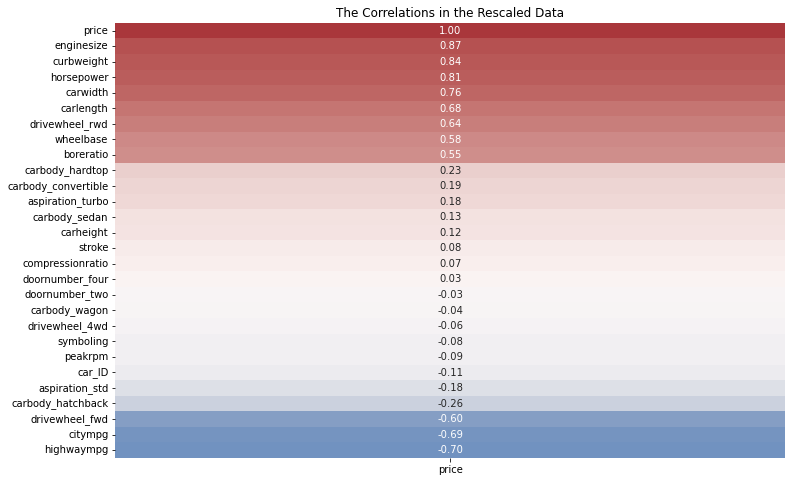

In [48]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(cars_dummies.corr()[['price']].sort_values('price', ascending=False),
            cmap='vlag', vmin=-1, vmax=1, annot=True, cbar=False, fmt='.2f', center=0)
ax.set(title="The Correlations in the Rescaled Data")

**Differences when creating a multiple regression model that includes dummy variables**  
  
- Passes **one** positional argument (the DataFrame) to the train_test_split() function.
- The method returns only two datasets: **training dataset** and **test dataset** => split the training dataset when calling the fit() method.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [50]:
cars_train, cars_test = train_test_split(cars_dummies, test_size=0.2, random_state=20)

In [51]:
# Choose independent variables
X_cols = ['enginesize', 'horsepower', 'carwidth', 'drivewheel_rwd', 'highwaympg']

X = cars_train[X_cols]
Y = cars_train.price
model = LinearRegression().fit(X, Y)

In [52]:
print(f"The score of the test dataset is {model.score(cars_test[X_cols], cars_test.price):.3f}")
print(f"The score of the training dataset is {model.score(cars_train[X_cols], cars_train.price):.3f}")

The score of the test dataset is 0.752
The score of the training dataset is 0.833


In [53]:
Y_pred = model.predict(cars_test[X_cols])

In [54]:
predicted = pd.DataFrame(Y_pred, columns=['pred_price'])
predicted = predicted.join([cars_test[X_cols].reset_index(drop=True), cars_test.price.reset_index(drop=True)])
predicted.head()

,pred_price,enginesize,horsepower,carwidth,drivewheel_rwd,highwaympg,price
0,13517.858822,0.218885,0.149133,0.183272,0,-0.837195,15250.0
1,5968.304606,-0.888455,-0.864871,-1.078431,0,1.783034,8916.5
2,4984.725918,-0.840310,-1.067671,-1.078431,0,0.181783,8778.0
3,37778.843127,1.831749,4.661448,2.987056,1,-0.400490,31400.5
4,5347.966676,-0.840310,-1.067671,-1.078431,0,1.055193,6488.0


#### Improve a multiple regression model  
  
** *To create the best model, select the right independent variable* **

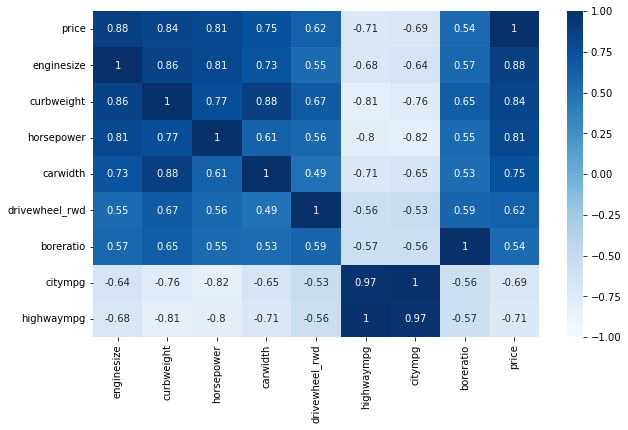

In [55]:
independent_and_price = ['enginesize', 'curbweight', 'horsepower', 'carwidth', 'drivewheel_rwd', 
                         'highwaympg', 'citympg', 'boreratio', 'price']
plt.figure(figsize=(10,6))
ax = sns.heatmap(cars_train[independent_and_price].corr().sort_values('price', ascending=False),
            cmap='Blues', vmin=-1, vmax=1, annot=True)


- To find the combination of independent variables that produces an optimal regression model, you need to experiment with different combinations of variables. This process can be tedious and take a lot of time.
- Fortunately, Scikit-learn privides *feature selection models* that help select the right features.

In [56]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

In [57]:
non_num_cols = ['CarName', 'fueltype', 'enginelocation', 'cylindernumber', 'fuelsystem', 'enginetype']
# Drop the non-numeric columns when spliting the data.
cars_train, cars_test = train_test_split(cars_dummies.drop(columns=non_num_cols), test_size=0.2, random_state=20)

In [58]:
fs = SelectKBest(score_func=mutual_info_regression, k=20)
fs.fit(cars_train.drop(columns='price'), cars_train.price)

SelectKBest(k=20,
            score_func=<function mutual_info_regression at 0x0000020593DE8EE0>)

In [59]:
X_train_fs = fs.transform(cars_train.drop(columns='price'))
X_test_fs = fs.transform(cars_test.drop(columns='price'))

In [60]:
model = LinearRegression().fit(X_train_fs, cars_train.price)

In [61]:
model.score(X_test_fs, cars_test.price)

0.7730268917681572

In [62]:
model.score(X_train_fs, cars_train.price)

0.8826996202377456

**Display the importance of each feature**

In [63]:
df1 = pd.DataFrame(cars_train.drop(columns='price').columns, columns=['feature'])
df2 = pd.DataFrame(fs.scores_, columns=['importance'])
importance = df1.join(df2)
importance.sort_values('importance', ascending=False).head()

,feature,importance
6,curbweight,0.902392
11,horsepower,0.876285
7,enginesize,0.857745
14,highwaympg,0.845416
13,citympg,0.736679


Comparing with the results with the correlations, you can see that:
- The **horsepower** feature is more important than the **enginesize** feature even though the **enginesize** feature has a higher correlation with price.
- The **highwaympg** and **citympg** features are ranked 3rd and 5th even though they have a negative correlation with price.
- Those five features are in top 5 even though some of them have a high degree of collinearity.

#### Use a for loop to score the model for varyring numbers of feature
*Since sklearn feature selector help select the right features, you now just need to figure out how many features to use.*


In [64]:
model = LinearRegression()
test_scores = []
train_scores = []

In [65]:
for i in range(1, len(cars_train.columns)):
    fs = SelectKBest(score_func=mutual_info_regression, k=i)
    fs.fit(cars_train.drop(columns='price'), cars_train.price)
    
    X_train_fs = fs.transform(cars_train.drop(columns='price'))
    X_test_fs = fs.transform(cars_test.drop(columns='price'))
    
    model.fit(X_train_fs, cars_train.price)
    
    test_score = model.score(X_test_fs, cars_test.price)
    train_score = model.score(X_train_fs, cars_train.price)
    test_scores.append(test_score)
    train_scores.append(train_score)

In [66]:
df_scores = pd.DataFrame({"test_scores":test_scores, 'train_scores':train_scores})
df_scores.reset_index(inplace=True)
df_scores.rename(columns={'index':"num_features"}, inplace=True)
df_scores.num_features = df_scores.num_features + 1

In [67]:
df_scores

,num_features,test_scores,train_scores
0,1,0.608708,0.701379
1,2,0.611429,0.704264
2,3,0.685315,0.781644
3,4,0.767383,0.815386
4,5,0.763173,0.815719
5,6,0.747073,0.822507
6,7,0.744563,0.822889
7,8,0.733167,0.824847
8,9,0.738644,0.838340
9,10,0.729937,0.838736


<AxesSubplot:xlabel='num_features'>

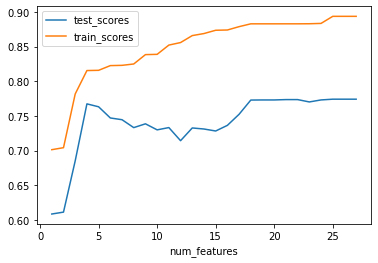

In [68]:
df_scores.plot(x='num_features', y=['test_scores', 'train_scores'])

- The test scores start to decrease after the model reaches 4 features.
- The test scores start to increase again arount 15 features.
- The gap between the test and training scores keeps getting larger after reaching 4 features.
  
What you're looking for is the highest training score, the smallest gap between the test and training scores, and the fewest features.  
In this case, therefore, the right numbers of features for this regression model is 4.

In [69]:
def regression_model(data, x_cols, y='price'):    
    data_train, data_test = train_test_split(data, test_size=0.2, random_state=20)
    X = data_train[x_cols]
    Y = data_train[y]
    model = LinearRegression().fit(X, Y)
    train_score = model.score(data_train[x_cols], data_train[y])
    test_score = model.score(data_test[x_cols], data_test[y])
    return train_score, test_score

In [70]:
cols = ['curbweight', 'horsepower', 'highwaympg', 'enginesize', 'citympg']
for i in range(len(cols)):
    x_cols = cols[:i] + cols[i+1:]
    print("The 4 features are: ")
    print(*x_cols)
    train_score, test_score = regression_model(cars_dummies, x_cols)
    print(f"The training score is {train_score:.3f}")
    print(f"The test score is {test_score:.3f}")
    print()

The 4 features are: 
horsepower highwaympg enginesize citympg
The training score is 0.802
The test score is 0.719

The 4 features are: 
curbweight highwaympg enginesize citympg
The training score is 0.805
The test score is 0.736

The 4 features are: 
curbweight horsepower enginesize citympg
The training score is 0.815
The test score is 0.768

The 4 features are: 
curbweight horsepower highwaympg citympg
The training score is 0.782
The test score is 0.691

The 4 features are: 
curbweight horsepower highwaympg enginesize
The training score is 0.815
The test score is 0.767



**Experiment with different numbers of independent variables in order of smallest to largest importance from the Importance DataFrame**

In [71]:
sorted_importance = importance.sort_values("importance", ascending=False)
sorted_importance

,feature,importance
6,curbweight,0.902392
11,horsepower,0.876285
7,enginesize,0.857745
14,highwaympg,0.845416
13,citympg,0.736679
4,carwidth,0.672181
2,wheelbase,0.584955
3,carlength,0.560273
0,car_ID,0.439070
8,boreratio,0.386570


In [72]:
train, test = [], []
for i in range(sorted_importance.shape[0]):
    x_cols = sorted_importance.feature.to_list()[:i+1]
    train_score, test_score = regression_model(cars_dummies, x_cols)
    train.append(train_score)
    test.append(test_score)

In [73]:
result = pd.DataFrame({"train":train, 'test':test})
result.reset_index(inplace=True)

In [74]:
result['index'] = result.index + 1
result.rename(columns={"index":"feature"}, inplace=True)

In [75]:
result

,feature,train,test
0,1,0.701379,0.608708
1,2,0.774061,0.711521
2,3,0.815141,0.767103
3,4,0.815386,0.767383
4,5,0.815719,0.763173
5,6,0.822507,0.747073
6,7,0.822889,0.744563
7,8,0.824847,0.733167
8,9,0.838340,0.738644
9,10,0.838736,0.729937


<AxesSubplot:xlabel='feature'>

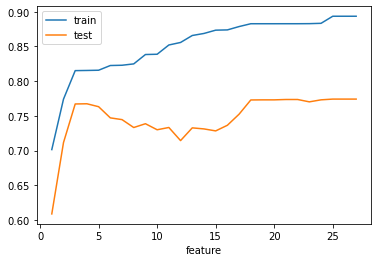

In [76]:
result.plot(x='feature', y=['train', 'test'])